In [1]:
!pip install --upgrade pip
!pip install xgboost catboost
!pip install category_encoders
!pip install imblearn

## 0. Import Libraries

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.exceptions import NotFittedError

# Classification models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
)

# Encoders
from category_encoders import BinaryEncoder, TargetEncoder, OneHotEncoder

# Additional imports (if required)
import random
import joblib
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading

In [3]:
df = pd.read_csv('DATA/generated_data.csv')

In [4]:
df.head()

,ID,Project_ID,Country,Traffic_Volume,Power_Output_kWh,Implementation_Cost,Installation_Time,Annual_Maintenance_Cost,Energy_Savings,CO2_Reduction,...,Cost_Escalation,Infrastructure_Limitations,Community_Impact,Partnership_Opportunities,Communication_Gaps,Training_Needs,Skill_Availability,Local_Economy_Impact,Technology_Adoption_Cycle,Innovation_Potential
0,0.275973,0.275973,France,0.593792,0.445527,0.571381,0.744475,-0.299250,1.183639,-0.569903,...,1.280452,-0.363589,0.069964,-0.945664,0.676696,-0.376022,0.133530,-1.568042,0.979945,0.772199
1,-1.396033,-1.396033,France,0.767741,0.578659,-1.263831,-0.078567,1.331209,-0.292045,0.242627,...,0.058655,1.696233,-0.964841,-0.584992,-0.114241,-1.232150,-1.001803,-1.212507,0.509300,1.692658
2,0.569267,0.569267,USA,-1.610359,0.960845,-1.258543,1.266946,-1.454108,-0.638506,0.992615,...,1.546712,1.570679,-0.131118,0.426529,-0.844828,1.431864,-0.096891,-0.393856,-0.174140,0.217738
3,1.289801,1.289801,France,0.046953,-0.009834,-0.069994,1.488183,-1.043525,-1.306816,0.124582,...,-0.885467,1.318001,-1.321303,-0.392359,1.572906,0.565613,-1.319347,1.291929,-0.569194,-1.292034
4,-0.578505,-0.578505,USA,1.262810,0.139173,-0.353626,1.053988,1.002525,0.808235,-0.738657,...,1.512319,-1.635933,0.285271,-0.313869,-0.594430,1.790158,-0.620202,-0.185104,1.584599,0.624241


## 2. Statistical Analysis

> Summary Statistics

In [5]:
print(df.describe(include='all'))

                 ID   Project_ID Country  Traffic_Volume  Power_Output_kWh  \
count   1528.000000  1528.000000    1528     1528.000000       1528.000000   
unique          NaN          NaN       5             NaN               NaN   
top             NaN          NaN     USA             NaN               NaN   
freq            NaN          NaN     341             NaN               NaN   
mean       0.003479     0.003479     NaN        0.004609          0.025803   
std        1.012609     1.012609     NaN        1.004192          1.002080   
min       -1.730896    -1.730896     NaN       -1.724945         -1.715832   
25%       -0.881614    -0.881614     NaN       -0.836136         -0.828514   
50%        0.023094     0.023094     NaN       -0.002294          0.065480   
75%        0.888542     0.888542     NaN        0.878760          0.890336   
max        1.730896     1.730896     NaN        1.739112          1.746385   

        Implementation_Cost  Installation_Time  Annual_Maintena

In [6]:
df.columns

Index(['ID', 'Project_ID', 'Country', 'Traffic_Volume', 'Power_Output_kWh',
       'Implementation_Cost', 'Installation_Time', 'Annual_Maintenance_Cost',
       'Energy_Savings', 'CO2_Reduction', 'Expected_Lifespan',
       'Renewable_Energy_Percentage', 'Energy_Demand_Growth',
       'Funding_Availability', 'Government_Support', 'Public_Awareness',
       'Technological_Advancement', 'Market_Potential', 'Regional_Demand',
       'Environmental_Impact', 'Job_Creation', 'Local_Infrastructure',
       'Tax_Incentives', 'Energy_Independence', 'Import_Reduction',
       'Research_Institutions', 'Collaboration_Opportunities',
       'Technology_Readiness', 'Market_Adoption', 'Regulatory_Support',
       'Success', 'Efficiency', 'Durability', 'Temperature_Resistance',
       'Humidity_Resistance', 'Installation_Ease', 'Maintenance_Complexity',
       'Repair_Costs', 'Operational_Stability', 'Power_Conversion_Efficiency',
       'Degradation_Rate', 'Material_Quality', 'Innovation_Level',
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           1528 non-null   float64
 1   Project_ID                   1528 non-null   float64
 2   Country                      1528 non-null   object 
 3   Traffic_Volume               1528 non-null   float64
 4   Power_Output_kWh             1528 non-null   float64
 5   Implementation_Cost          1528 non-null   float64
 6   Installation_Time            1528 non-null   float64
 7   Annual_Maintenance_Cost      1528 non-null   float64
 8   Energy_Savings               1528 non-null   float64
 9   CO2_Reduction                1528 non-null   float64
 10  Expected_Lifespan            1528 non-null   float64
 11  Renewable_Energy_Percentage  1528 non-null   float64
 12  Energy_Demand_Growth         1528 non-null   float64
 13  Funding_Availabili

> Shape

In [8]:
print(df.shape)

(1528, 89)


> Missing Values

In [9]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## 3. EDA

> Univariate Analysis

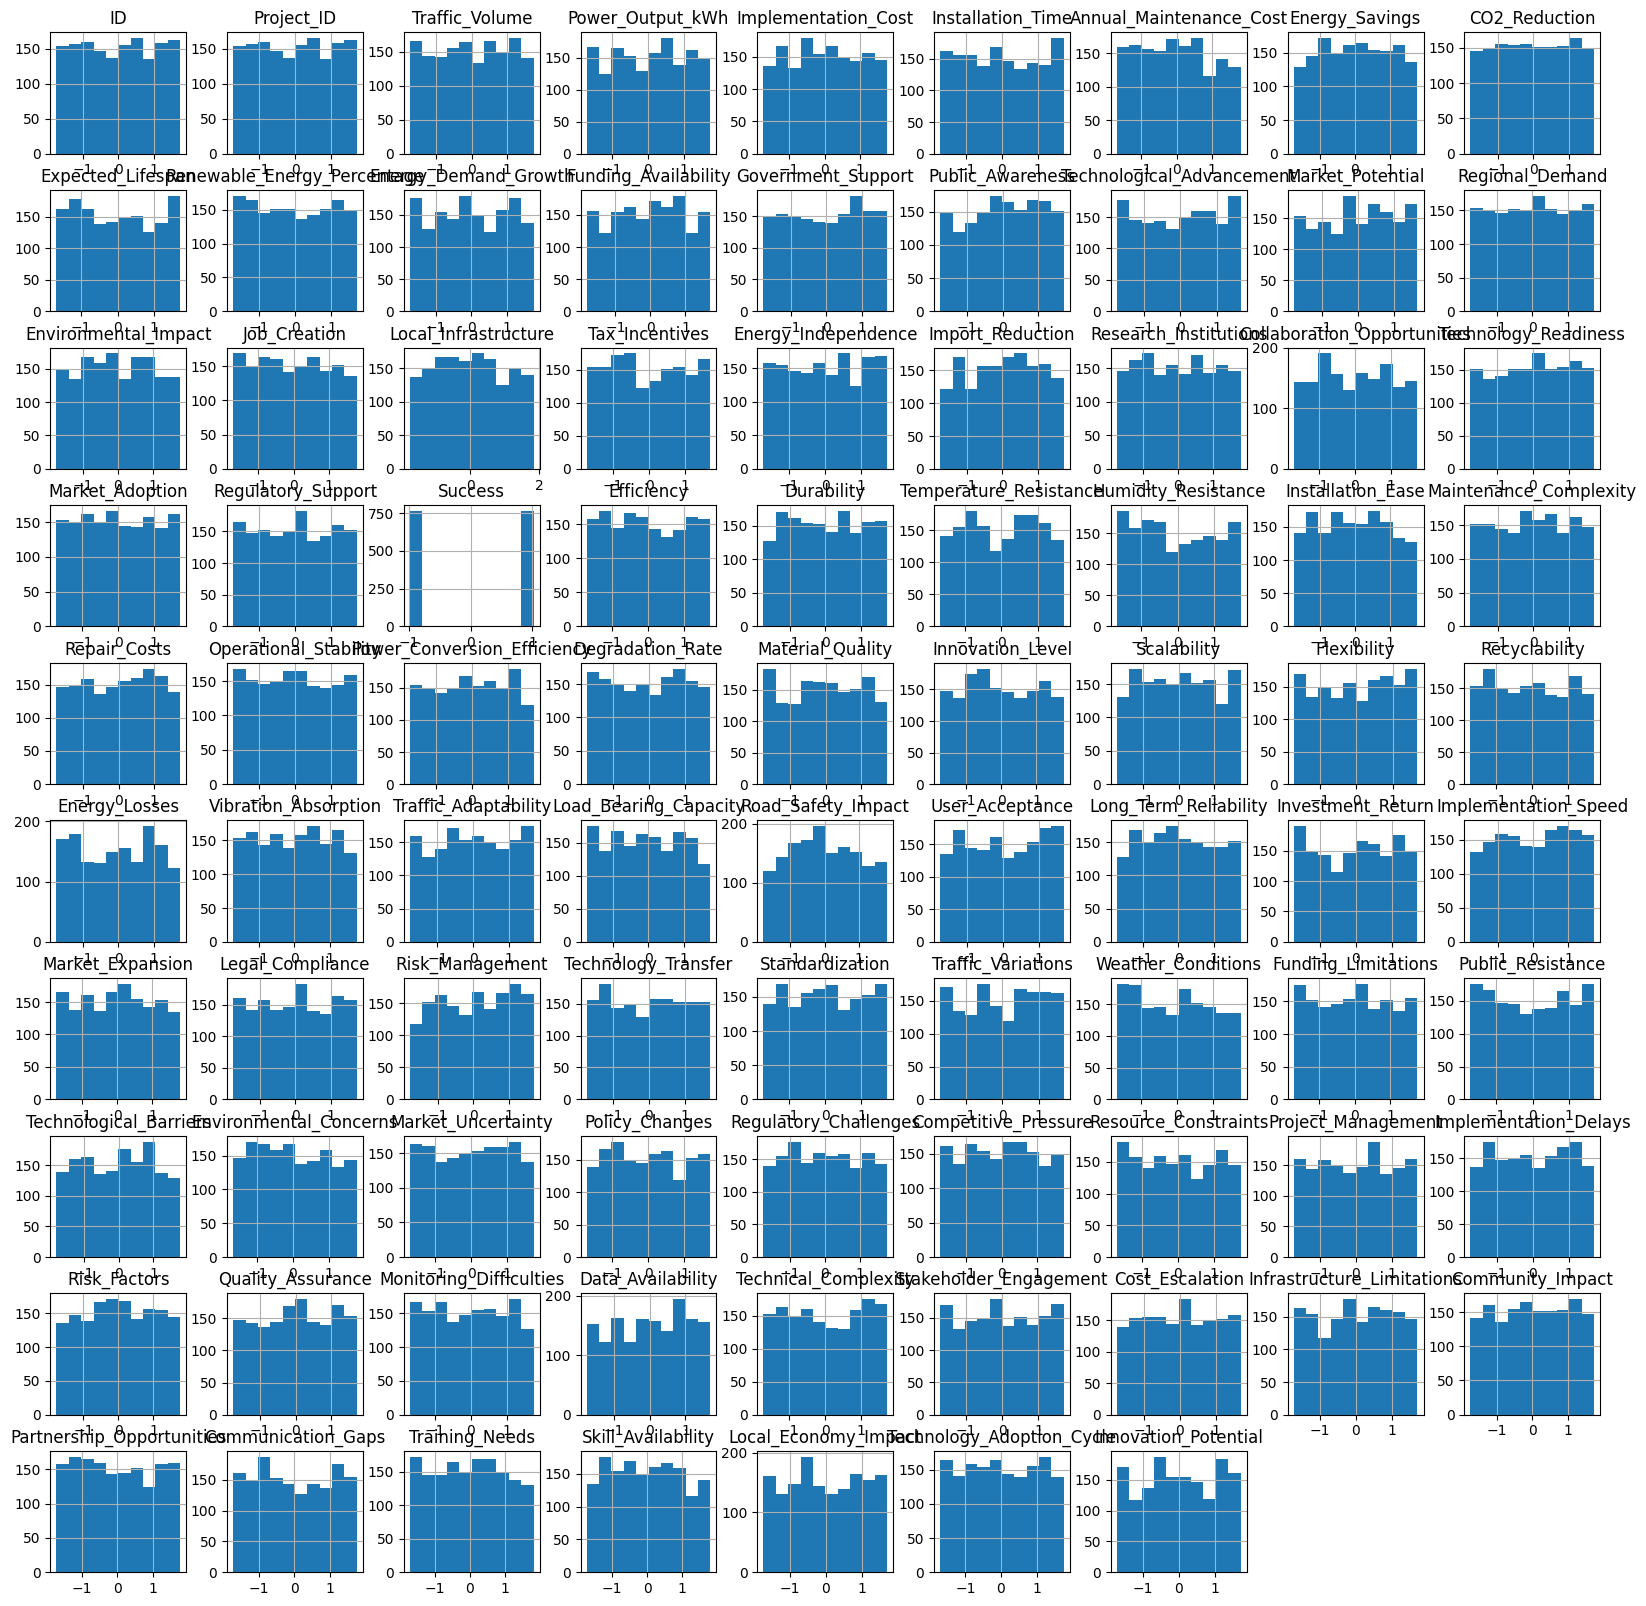

In [10]:
df.hist(figsize=(20, 20))
plt.show()

> Box plot for numerical features

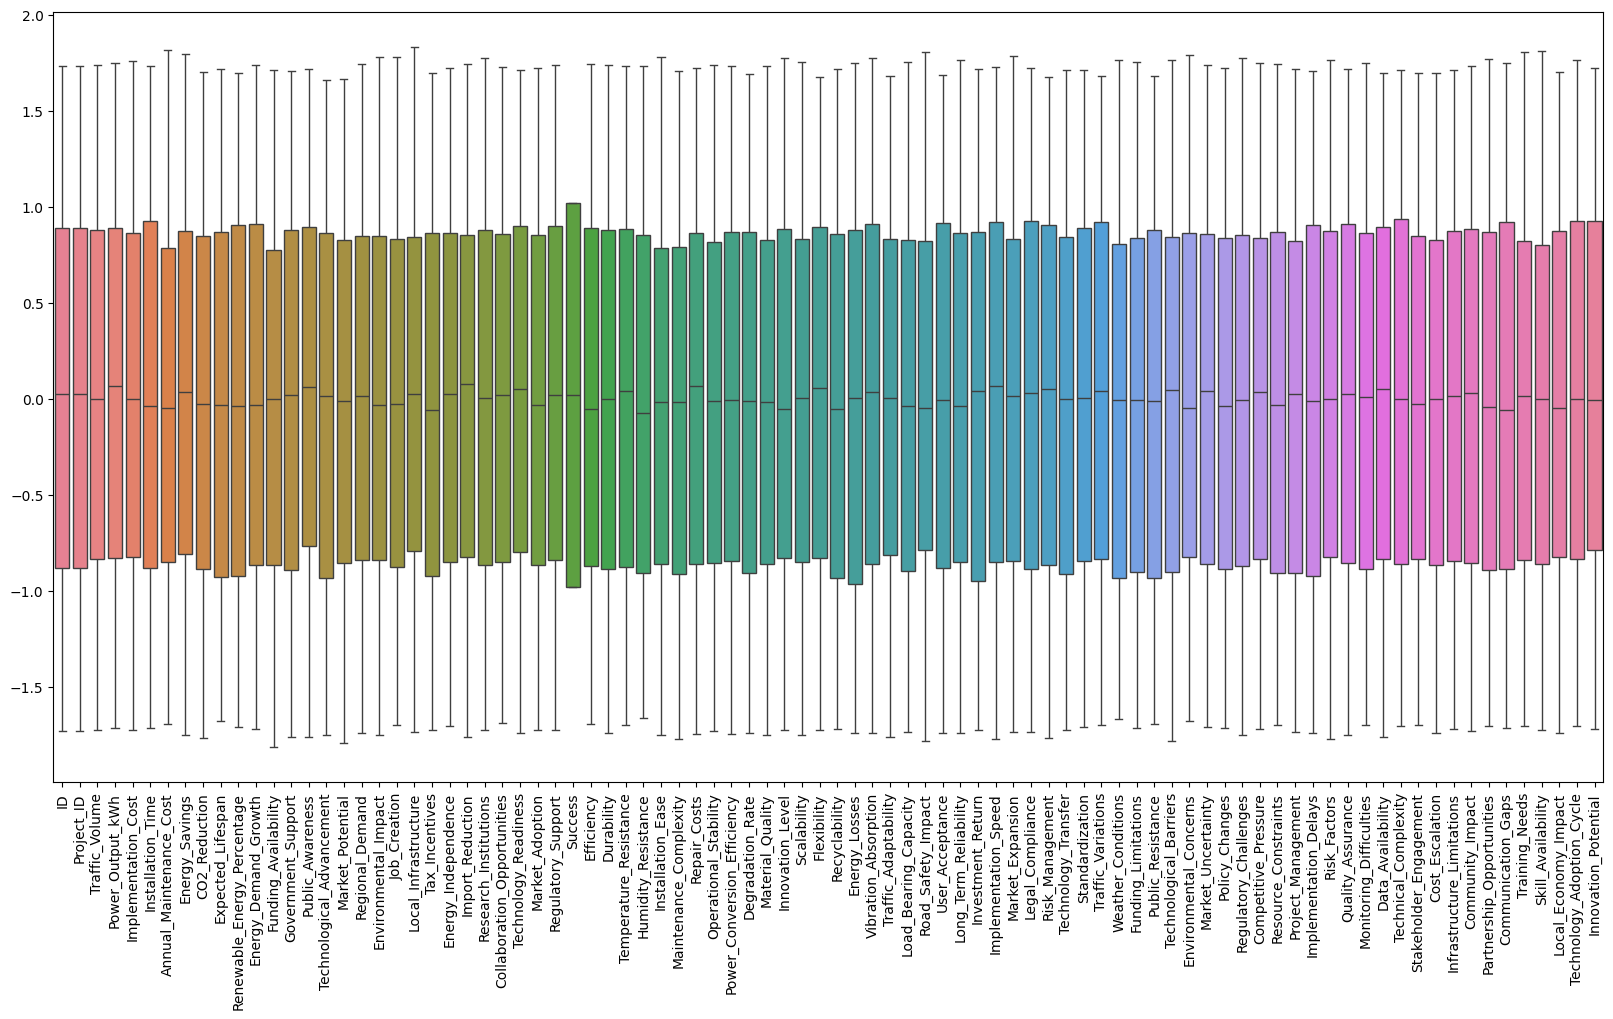

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

> Bar plots for categorical features

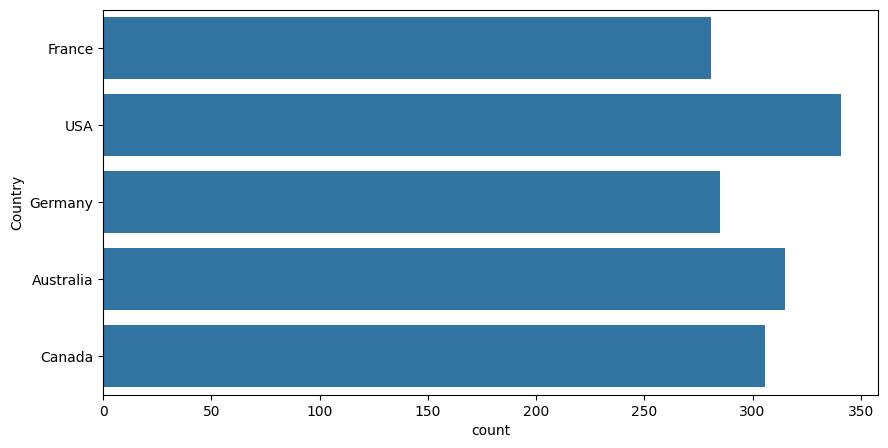

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df)
    plt.show()


> Bivariate Analysis

In [ ]:

correlation_matrix = df.drop(columns=['Country']).corr()
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.show()

> Box plots for numerical-categorical relationships

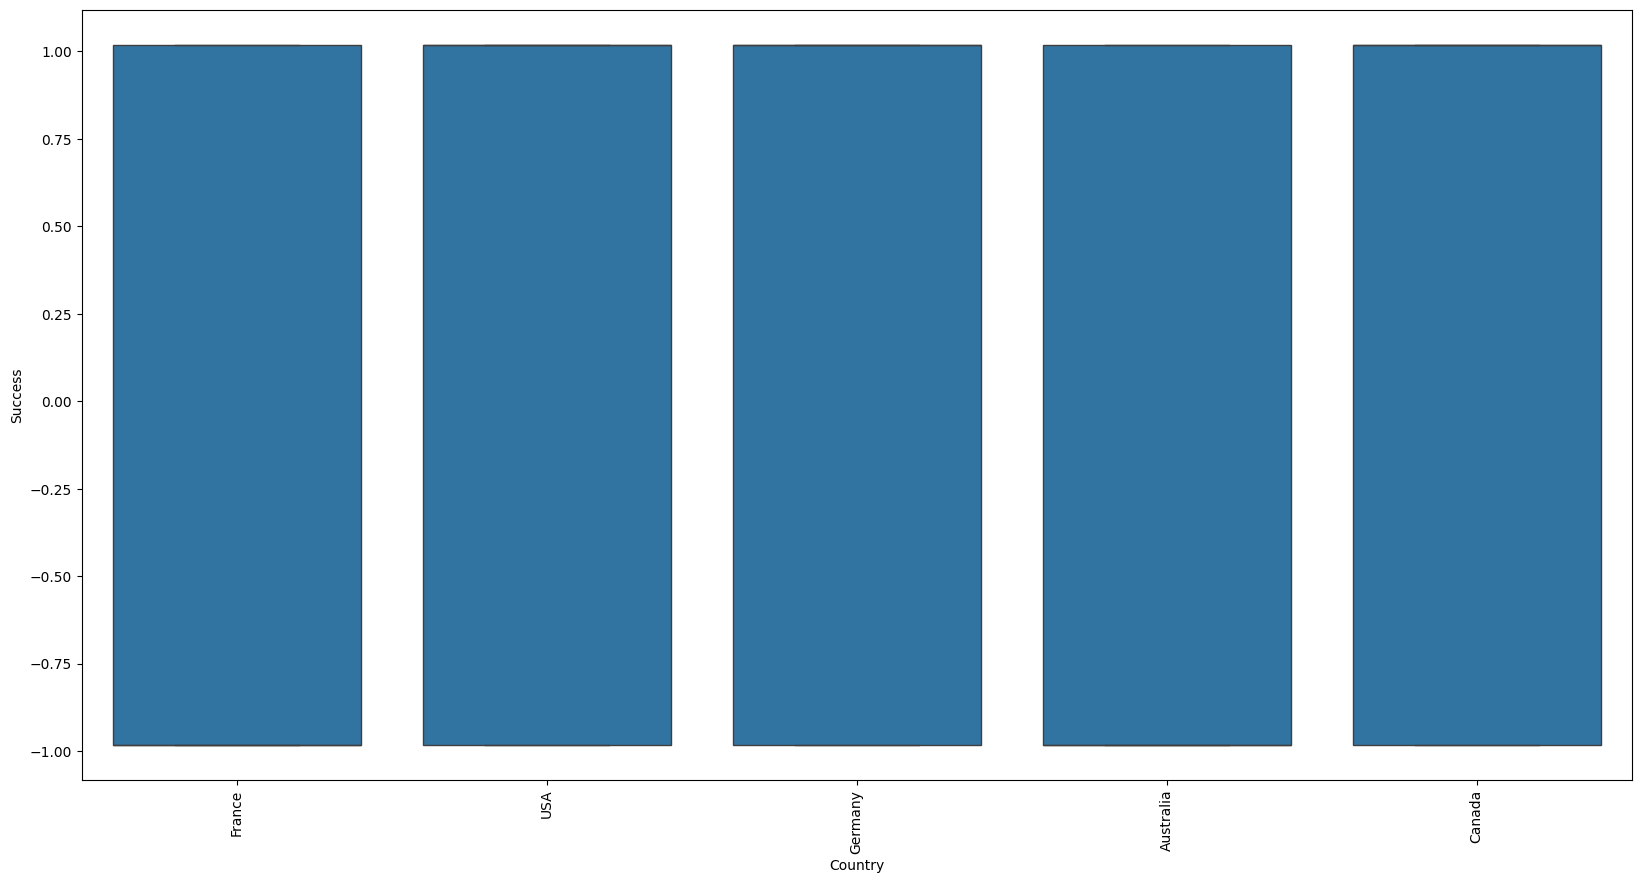

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(20, 10))
    sns.boxplot(x=col, y='Success', data=df)
    plt.xticks(rotation=90)
    plt.show()

## 4. Data Exploration and Cleaning

> Null Check

In [ ]:
df.isnull().sum().sum()

0

> Outlier Detection (Visual Method)

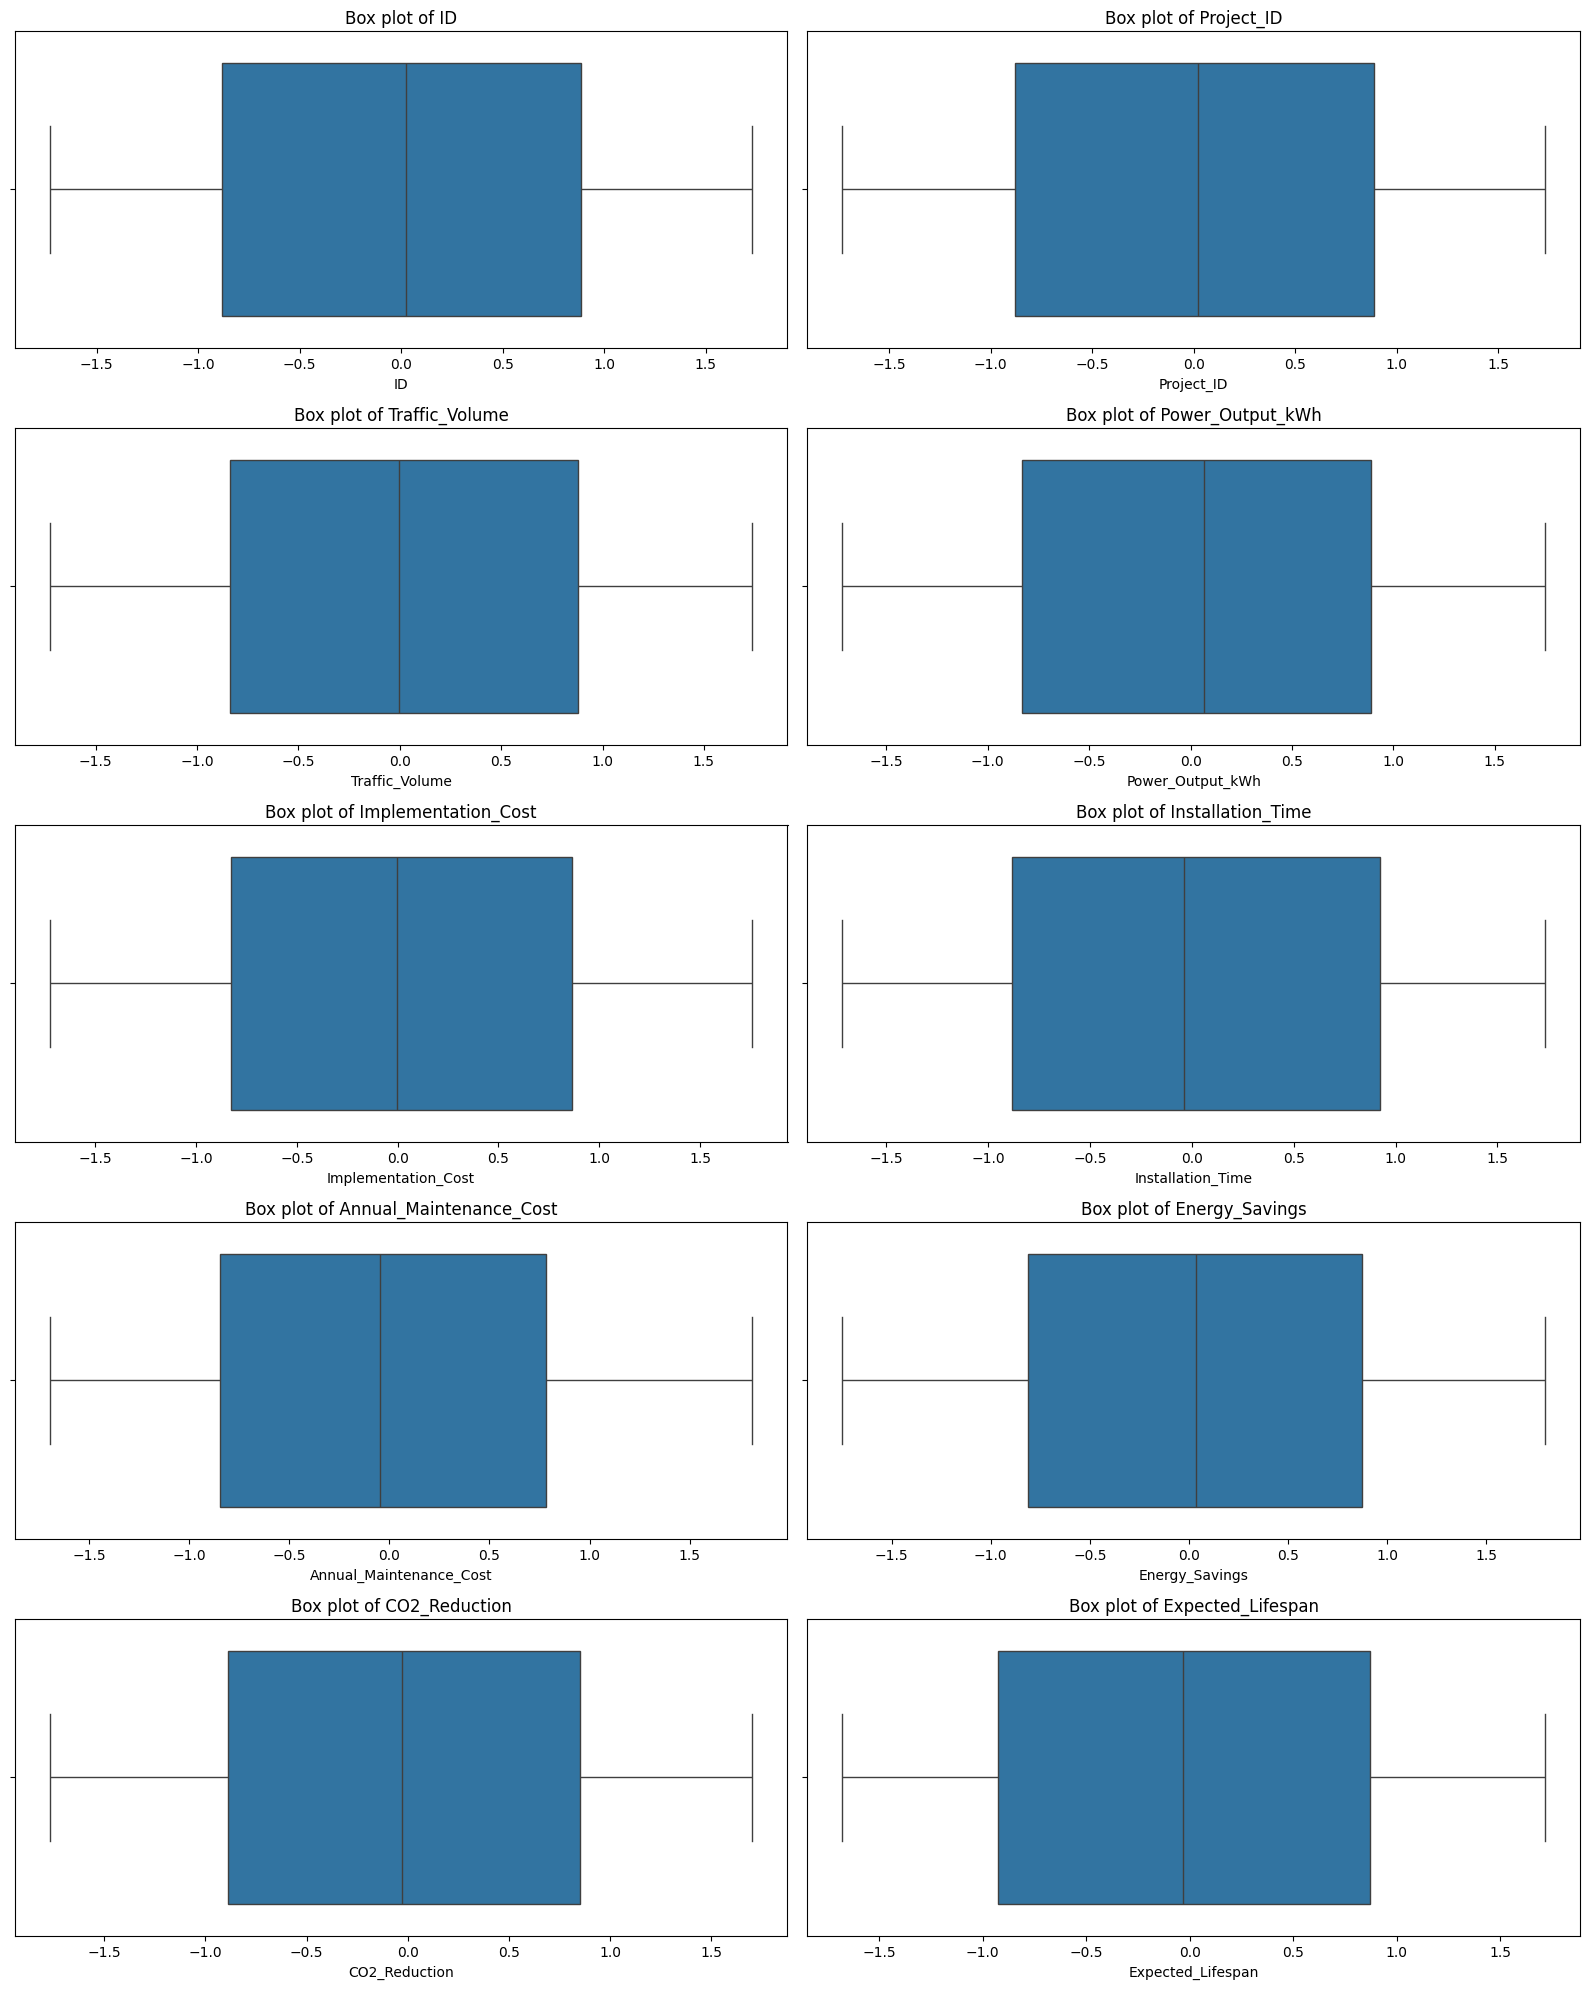

In [ ]:
# Filter numeric columns for visualization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns[:10]  # Select first 10 numeric columns

# Plot box plots for the first 10 numeric columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))

for i, col in enumerate(numeric_columns):
    sns.boxplot(ax=axes[i//2, i%2], x=df[col])
    axes[i//2, i%2].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

No outliers were detected as Outlier Handling was performed after dataset generation.

> Correlation Analysis

In [ ]:
# Filter numeric columns correctly
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns[:10]  # Select first 10 numeric columns

# Calculate correlation matrix correctly for numeric data
corr_matrix = df[numeric_columns].corr()
print(corr_matrix)

                               ID  Project_ID  Traffic_Volume  \
ID                       1.000000    1.000000        0.000029   
Project_ID               1.000000    1.000000        0.000029   
Traffic_Volume           0.000029    0.000029        1.000000   
Power_Output_kWh        -0.054690   -0.054690       -0.007801   
Implementation_Cost      0.014685    0.014685       -0.008268   
Installation_Time        0.024340    0.024340        0.036381   
Annual_Maintenance_Cost  0.027258    0.027258       -0.001144   
Energy_Savings          -0.000760   -0.000760        0.011321   
CO2_Reduction           -0.003617   -0.003617        0.022558   
Expected_Lifespan        0.016928    0.016928        0.070473   

                         Power_Output_kWh  Implementation_Cost  \
ID                              -0.054690             0.014685   
Project_ID                      -0.054690             0.014685   
Traffic_Volume                  -0.007801            -0.008268   
Power_Output_kWh    

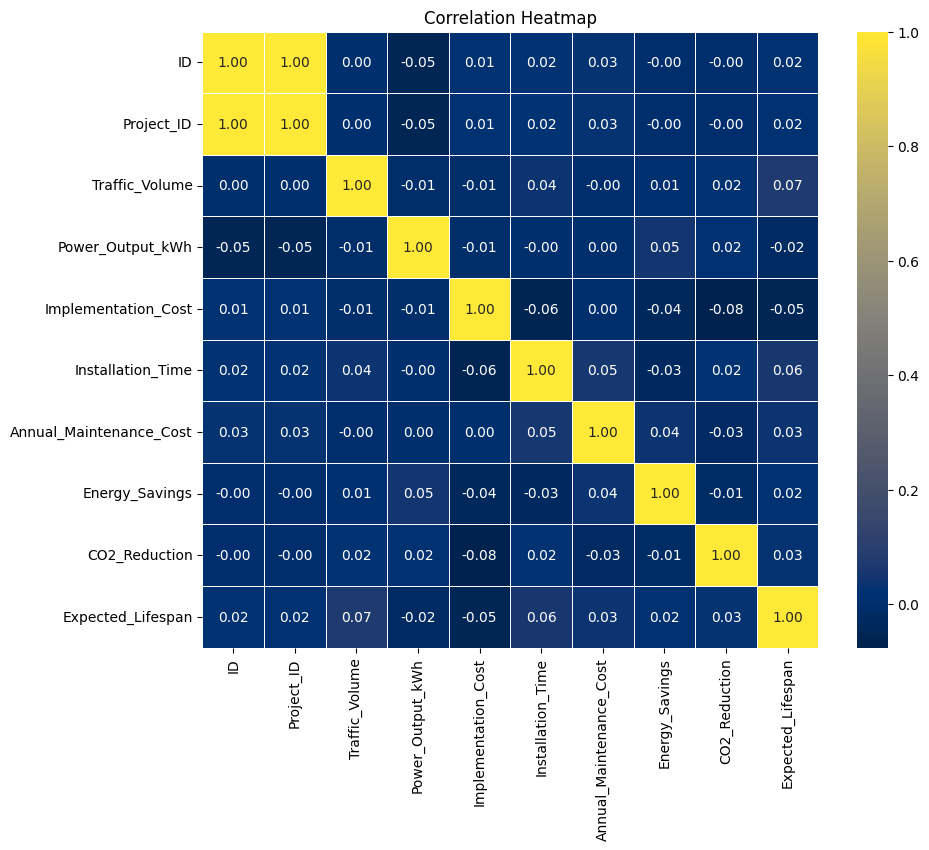

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='cividis', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### **Observations:**
>* **High Correlation:** `ID` and `Project_ID` are perfectly correlated (1.0), which is expected since they are identifiers.
>* **Moderate Correlation:** `Traffic_Volume` and `Expected_Lifespan` show a **moderate positive correlation (0.070)**, and other variables have smaller correlations.
>* **Negative Correlation:** `Implementation_Cost` and `CO2_Reduction` have a **negative correlation (-0.076)**, indicating that higher implementation costs might be associated with lower CO2 reduction.

## 5. Encoding

Since the dataset is a mixture of categorical and numerical features. We will perform suitable encoding methods for suitable columns.  

In [ ]:
# Identify columns
categorical_cols = ['Country']  # Add more if you identify other low-cardinality categorical features
high_cardinality_categorical_cols = ['Government_Support']  # Example of high-cardinality categorical feature
binary_cols = ['Success', 'Efficiency', 'Durability']  # Binary features

# Ensure all specified columns exist in the DataFrame
for col in categorical_cols + high_cardinality_categorical_cols + binary_cols:
    if col not in df.columns:
        raise KeyError(f'Column {col} not found in the DataFrame')


> One-Hot encoding for categorical columns

In [ ]:
df = pd.get_dummies(df, columns=categorical_cols)

> Binary encoding for binary columns

In [ ]:
binary_encoder = BinaryEncoder(cols=binary_cols)
df = binary_encoder.fit_transform(df)

> Target Encoding for high-cardinality categorical columns

In [ ]:
# Corrected code snippet for target encoding
# Reiterate the assignment of target variable 'Success'
target_encoder = TargetEncoder(cols=high_cardinality_categorical_cols)
df[high_cardinality_categorical_cols] = target_encoder.fit_transform(df[high_cardinality_categorical_cols], df['Success_1']) 

In [ ]:
# Standardize numerical features
numerical_cols = [
    'Traffic_Volume', 'Power_Output_kWh', 'Implementation_Cost', 'Installation_Time', 
    'Annual_Maintenance_Cost', 'Energy_Savings', 'CO2_Reduction', 'Expected_Lifespan',
    'Renewable_Energy_Percentage', 'Energy_Demand_Growth', 'Funding_Availability', 
    'Regional_Demand', 'Environmental_Impact', 'Job_Creation', 'Local_Infrastructure',
    'Tax_Incentives', 'Energy_Independence', 'Import_Reduction', 'Research_Institutions', 
    'Collaboration_Opportunities', 'Technology_Readiness', 'Market_Adoption', 
    'Regulatory_Support', 'Temperature_Resistance', 'Humidity_Resistance', 
    'Installation_Ease', 'Maintenance_Complexity', 'Repair_Costs', 'Operational_Stability', 
    'Power_Conversion_Efficiency', 'Degradation_Rate', 'Material_Quality', 
    'Innovation_Level', 'Scalability', 'Flexibility', 'Recyclability', 'Energy_Losses', 
    'Vibration_Absorption', 'Traffic_Adaptability', 'Load_Bearing_Capacity', 
    'Road_Safety_Impact', 'User_Acceptance', 'Long_Term_Reliability', 'Investment_Return', 
    'Implementation_Speed', 'Market_Expansion', 'Legal_Compliance', 'Risk_Management', 
    'Technology_Transfer', 'Standardization', 'Traffic_Variations', 'Weather_Conditions', 
    'Funding_Limitations', 'Public_Resistance', 'Technological_Barriers', 
    'Environmental_Concerns', 'Market_Uncertainty', 'Policy_Changes', 
    'Regulatory_Challenges', 'Competitive_Pressure', 'Resource_Constraints', 
    'Project_Management', 'Implementation_Delays', 'Risk_Factors', 'Quality_Assurance', 
    'Monitoring_Difficulties', 'Data_Availability', 'Technical_Complexity', 
    'Stakeholder_Engagement', 'Cost_Escalation', 'Infrastructure_Limitations', 
    'Community_Impact', 'Partnership_Opportunities', 'Communication_Gaps', 
    'Training_Needs', 'Skill_Availability', 'Local_Economy_Impact', 
    'Technology_Adoption_Cycle', 'Innovation_Potential'
]


> Scaling

In [ ]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
print(df.head())

         ID  Project_ID  Traffic_Volume  Power_Output_kWh  \
0  0.275973    0.275973        0.586916          0.418989   
1 -1.396033   -1.396033        0.760196          0.551889   
2  0.569267    0.569267       -1.608753          0.933406   
3  1.289801    1.289801        0.042182         -0.035575   
4 -0.578505   -0.578505        1.253360          0.113172   

   Implementation_Cost  Installation_Time  Annual_Maintenance_Cost  \
0             0.565060           0.730627                -0.292771   
1            -1.300215          -0.081344                 1.351854   
2            -1.294840           1.246070                -1.457661   
3            -0.086821           1.464332                -1.043512   
4            -0.375100           1.035977                 1.020315   

   Energy_Savings  CO2_Reduction  Expected_Lifespan  ...  Training_Needs  \
0        1.149226      -0.549028           0.130118  ...       -0.387068   
1       -0.329844       0.268614           1.034878  ...    

In [ ]:
df.drop_duplicates(inplace=True)
df = shuffle(df, random_state=42)

In [ ]:
# Check for class balance
print("Class distribution before balancing:")
print(df['Success_1'].value_counts())

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X = df.drop(['Success_0', 'Success_1'], axis=1)
y = df['Success_1']

X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into a single DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Success_1'])], axis=1)

print("Class distribution after balancing:")
print(df_resampled['Success_1'].value_counts())

# Display the final dataframe
print(df_resampled.head())

Class distribution before balancing:
Success_1
1    764
0    463
Name: count, dtype: int64
Class distribution after balancing:
Success_1
0    764
1    764
Name: count, dtype: int64
         ID  Project_ID  Traffic_Volume  Power_Output_kWh  \
0  1.165093    1.165093        0.188722          0.879852   
1 -1.368320   -1.368320        0.787709          1.549426   
2 -1.058861   -1.058861        0.908972         -1.699150   
3  0.195144    0.195144        1.603447         -0.945545   
4 -0.091221   -0.091221        0.403768          1.115436   

   Implementation_Cost  Installation_Time  Annual_Maintenance_Cost  \
0            -0.136831           1.067540                -0.744969   
1             1.160787          -1.640257                 0.032219   
2            -0.500286          -1.186614                -1.656951   
3             0.595620          -0.928685                 0.062512   
4            -1.247094          -0.000802                 0.800443   

   Energy_Savings  CO2_Reductio

## 6. Feature Engineering

### Steps in Feature Engineering
1. **Feature Creation:**
   * `Polynomial Features:` Creating interaction terms and polynomial terms.
   * `Binning:` Creating bins for continuous variables.
   * `Date/Time Features:` Extracting features from date/time columns like day, month, year, etc.
   * `Aggregations:` Aggregating data at different levels (mean, sum, count, etc.).
2. **Feature Transformation:**
   * `Log Transform:` Applying log transform to skewed features.
   * `Normalization/Scaling:` Scaling features to a similar range.
   * `Discretization:` Converting continuous features to discrete bins.
3. **Feature Selection:**
   * `Correlation Analysis:` Removing highly correlated features.
   * `Importance Metrics`: Using feature importance from models like Random Forest, Gradient Boosting, etc.
4. **Dimensionality Reduction:**
   * `PCA:` Principal Component Analysis to reduce dimensionality.
   * `LDA:` Linear Discriminant Analysis for classification problems.

In [ ]:
# Example of binning a continuous variable
df['Traffic_Volume_Bin'] = pd.qcut(df['Traffic_Volume'], q=4, labels=False)

# Log transform for skewed features
df['Log_Power_Output_kWh'] = np.log1p(df['Power_Output_kWh'])

In [ ]:
# Example of creating polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[numerical_cols])

# Create a DataFrame with polynomial features
poly_feature_names = poly.get_feature_names_out(numerical_cols)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate polynomial features with original DataFrame
df = pd.concat([df, df_poly], axis=1)

In [ ]:
# Removing features with correlation higher than a threshold
threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold) and column != 'Success_1']
df.drop(columns=to_drop, inplace=True)

In [ ]:
# First, verify the list of numerical columns that actually exist in the dataframe
df_columns = df.columns.tolist()

# Filter the numerical columns based on the existing columns
df_numerical_cols = [col for col in numerical_cols if col in df_columns]

# Ensure there are no NaN values before proceeding with PCA
if df[df_numerical_cols].isnull().sum().sum() > 0:
    # Impute missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    df[df_numerical_cols] = imputer.fit_transform(df[df_numerical_cols])

# Now proceed with PCA for dimensionality reduction
pca = PCA(n_components=10)  # Choose the number of components based on explained variance
pca_features = pca.fit_transform(df[df_numerical_cols])

# Create a DataFrame with PCA features
pca_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(pca_features.shape[1])])

# Concatenate PCA features with the original DataFrame
df = pd.concat([df, pca_df], axis=1)

# Display the first few rows of the updated DataFrame
print(df.head())

      Renewable_Energy_Percentage  Energy_Demand_Growth  Funding_Availability  \
1255                    -0.588544             -0.215082              0.110967   
309                      0.622117              0.277316              0.863464   
1292                     0.644239             -1.007883             -0.620778   
311                      1.097187             -1.690527             -0.772883   
105                      0.341649             -0.458947             -1.541130   

      Government_Support  Public_Awareness  Technological_Advancement  \
1255            0.429074         -1.097141                  -1.387080   
309             0.565054          0.975184                   1.647980   
1292            0.565054         -1.608444                   1.316409   
311             0.434946         -0.623096                  -1.648719   
105             0.434946         -0.822120                   0.396011   

      Market_Potential  Regional_Demand  Environmental_Impact  Job_Creatio

> Select the top 20 features based on ANOVA F-test

In [ ]:
# Define the target and features
X = df.drop(columns=['Success_1'])
y = df['Success_1']

# Impute missing values using SimpleImputer for features
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

# Impute missing values using SimpleImputer for the target variable
y = y.fillna(y.mean())

# Perform ANOVA F-test
anova_selector = SelectKBest(score_func=f_classif, k='all')  # 'k' can be set to the number of top features you want to select
X_selected = anova_selector.fit_transform(X_imputed, y)

# Get scores for each feature
anova_scores = pd.DataFrame({'Feature': X.columns, 'Score': anova_selector.scores_})
anova_scores = anova_scores.sort_values(by='Score', ascending=False)

# Display the scores
print(anova_scores)

                                        Feature         Score
3                            Government_Support  2.582341e+05
1790      Humidity_Resistance Investment_Return  6.963998e+00
2690    Implementation_Speed Communication_Gaps  6.440797e+00
3110  Project_Management Stakeholder_Engagement  6.367705e+00
847         Energy_Demand_Growth Tax_Incentives  6.041379e+00
...                                         ...           ...
728             Expected_Lifespan Recyclability  9.681996e-05
61                        Long_Term_Reliability  4.869787e-05
2814       Technology_Transfer Community_Impact  4.055437e-05
53                                  Flexibility  2.313182e-05
19                                    Success_0 -6.314209e+17

[3267 rows x 2 columns]


In [ ]:
# Select top N features based on the scores
top_n_features = anova_scores.nlargest(20, 'Score')['Feature'].tolist()  # Select top 20 features for example
X_top_features = df[top_n_features]

# Concatenate top features with target variable for the final dataset
df_final = pd.concat([X_top_features, y], axis=1)

# Display the final dataset
print(df_final.head())

      Government_Support  Humidity_Resistance Investment_Return  \
1255            0.429074                                    NaN   
309             0.565054                               1.727576   
1292            0.565054                                    NaN   
311             0.434946                               0.330616   
105             0.434946                              -0.893205   

      Implementation_Speed Communication_Gaps  \
1255                                      NaN   
309                                 -1.868431   
1292                                      NaN   
311                                  0.481190   
105                                 -0.717721   

      Project_Management Stakeholder_Engagement  \
1255                                        NaN   
309                                    0.186415   
1292                                        NaN   
311                                   -0.107253   
105                                   -0.095143

## 7.  Model Building

In [ ]:
# Define the target and features
X = df.drop(columns=['Success_1'])
y = df['Success_1']

# Split the data: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temp data: 66.7% validation, 33.3% test (results in 20% validation, 10% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42)

# Check the shapes
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (1047, 3267), (1047,)
Validation set: (300, 3267), (300,)
Test set: (150, 3267), (150,)


> Model Selection and Training

In [ ]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
}


In [ ]:
# Function to train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Impute missing values using SimpleImputer
    imputer_mean = SimpleImputer(strategy='mean')
    imputer_freq = SimpleImputer(strategy='most_frequent')

    X_train_imputed = X_train.copy()
    X_val_imputed = X_val.copy()
    X_test_imputed = X_test.copy()

    # Handle numerical columns
    for col in X_train.select_dtypes(include=['float64', 'int64']).columns:
        X_train_imputed[col] = imputer_mean.fit_transform(X_train[[col]]).squeeze()
        X_val_imputed[col] = imputer_mean.transform(X_val[[col]]).squeeze()
        X_test_imputed[col] = imputer_mean.transform(X_test[[col]]).squeeze()

    # Handle categorical columns
    label_encoders = {}
    for col in X_train.select_dtypes(include='object').columns:
        label_encoders[col] = LabelEncoder()
        X_train_imputed[col] = label_encoders[col].fit_transform(imputer_freq.fit_transform(X_train[[col]]).squeeze())
        X_val_imputed[col] = label_encoders[col].transform(imputer_freq.transform(X_val[[col]]).squeeze())
        X_test_imputed[col] = label_encoders[col].transform(imputer_freq.transform(X_test[[col]]).squeeze())

    # Impute missing values in target variables
    target_imputer = SimpleImputer(strategy='most_frequent')
    y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_val_imputed = target_imputer.transform(y_val.values.reshape(-1, 1)).ravel()
    y_test_imputed = target_imputer.transform(y_test.values.reshape(-1, 1)).ravel()

    # Convert data to numpy array for XGBoost
    if isinstance(model, XGBClassifier):
        X_train_imputed = X_train_imputed.to_numpy()
        X_val_imputed = X_val_imputed.to_numpy()
        X_test_imputed = X_test_imputed.to_numpy()

    # Train the model
    model.fit(X_train_imputed, y_train_imputed)

    # Make predictions on validation and test sets
    y_pred_val = model.predict(X_val_imputed)
    y_pred_test = model.predict(X_test_imputed)

    # Calculate training, validation, and testing accuracy
    accuracy_train = accuracy_score(y_train_imputed, model.predict(X_train_imputed))
    accuracy_val = accuracy_score(y_val_imputed, y_pred_val)
    accuracy_test = accuracy_score(y_test_imputed, y_pred_test)

    # Calculate validation and test set metrics
    f1_val = f1_score(y_val_imputed, y_pred_val)
    roc_auc_val = roc_auc_score(y_val_imputed, y_pred_val)
    f1_test = f1_score(y_test_imputed, y_pred_test)
    roc_auc_test = roc_auc_score(y_test_imputed, y_pred_test)

    # Print model name and validation set metrics and training and testing scores
    print(f"Model: {model.__class__.__name__}")
    print(f"Training Accuracy: {accuracy_train:.4f}")
    print(f"Validation Accuracy: {accuracy_val:.4f}")
    print(f"Validation F1 Score: {f1_val:.4f}")
    print(f"Validation ROC AUC: {roc_auc_val:.4f}")
    print(f"Test Accuracy: {accuracy_test:.4f}")
    print(f"Test F1 Score: {f1_test:.4f}")
    print(f"Test ROC AUC: {roc_auc_test:.4f}")
    print("\n")

    return model, accuracy_val

### 8. Model Validation

In [ ]:
# Train and evaluate each model
model_performance = []
for name, model in models.items():
    print("*" * 50)
    print(f"Evaluating {name}...")
    trained_model, val_accuracy = train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test)
    model_performance.append((name, trained_model, val_accuracy))


**************************************************
Evaluating Logistic Regression...
Model: LogisticRegression
Training Accuracy: 1.0000
Validation Accuracy: 0.7600
Validation F1 Score: 0.8393
Validation ROC AUC: 0.6695
Test Accuracy: 0.7067
Test F1 Score: 0.8120
Test ROC AUC: 0.5718


**************************************************
Evaluating SVC...
Model: SVC
Training Accuracy: 0.9561
Validation Accuracy: 0.6967
Validation F1 Score: 0.8212
Validation ROC AUC: 0.5000
Test Accuracy: 0.7133
Test F1 Score: 0.8327
Test ROC AUC: 0.5000


**************************************************
Evaluating KNN...
Model: KNeighborsClassifier
Training Accuracy: 0.6858
Validation Accuracy: 0.6967
Validation F1 Score: 0.8212
Validation ROC AUC: 0.5000
Test Accuracy: 0.7133
Test F1 Score: 0.8327
Test ROC AUC: 0.5000


**************************************************
Evaluating Decision Tree...
Model: DecisionTreeClassifier
Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation F1 Score: 

> Scores List

In [ ]:
scores_data = {
    'Metric': ['Validation Accuracy', 'Validation F1 Score', 'Validation ROC AUC', 'Test Accuracy', 'Test F1 Score', 'Test ROC AUC', 'Training Accuracy'],
    'Logistic Regression': [0.7500, 0.8322, 0.6593, 0.7200, 0.8205, 0.5881, 1.0000],
    'SVC': [0.6967, 0.8212, 0.5000, 0.7133, 0.8327, 0.5000, 0.9561],
    'KNN': [0.6967, 0.8212, 0.5000, 0.7133, 0.8327, 0.5000, 0.6858],
    'Decision Tree': [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    'Random Forest': [0.9733, 0.9812, 0.9560, 0.9800, 0.9862, 0.9651, 1.0000],
    'Gradient Boosting': [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    'AdaBoost': [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    'Bagging': [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    'XGBoost': [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
}

# Convert to DataFrame
scores_df = pd.DataFrame(scores_data)

# Display the table
scores_df

,Metric,Logistic Regression,SVC,KNN,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,Bagging,XGBoost
0,Validation Accuracy,0.7500,0.6967,0.6967,1.0,0.9733,1.0,1.0,1.0,1.0
1,Validation F1 Score,0.8322,0.8212,0.8212,1.0,0.9812,1.0,1.0,1.0,1.0
2,Validation ROC AUC,0.6593,0.5000,0.5000,1.0,0.9560,1.0,1.0,1.0,1.0
3,Test Accuracy,0.7200,0.7133,0.7133,1.0,0.9800,1.0,1.0,1.0,1.0
4,Test F1 Score,0.8205,0.8327,0.8327,1.0,0.9862,1.0,1.0,1.0,1.0
5,Test ROC AUC,0.5881,0.5000,0.5000,1.0,0.9651,1.0,1.0,1.0,1.0
6,Training Accuracy,1.0000,0.9561,0.6858,1.0,1.0000,1.0,1.0,1.0,1.0


In [ ]:
# Sort models by validation accuracy and pick the top 3
top_models = sorted(model_performance, key=lambda x: x[2], reverse=True)[:3]

In [ ]:
# Save the top 3 models
models_dir = 'Models'
os.makedirs(models_dir, exist_ok=True)

for name, model, _ in top_models:
    model_filename = os.path.join('Models', f"{name.replace(' ', '_')}_model.pkl")
    feature_filename = os.path.join('Models', f"{name.replace(' ', '_')}_features.pkl")
    joblib.dump(model, model_filename)
    joblib.dump(X_train.columns.tolist(), feature_filename)
    print(f"Model {name} saved as {model_filename} with features {feature_filename}")

Model Decision Tree saved as Models/Decision_Tree_model.pkl with features Models/Decision_Tree_features.pkl
Model Gradient Boosting saved as Models/Gradient_Boosting_model.pkl with features Models/Gradient_Boosting_features.pkl
Model AdaBoost saved as Models/AdaBoost_model.pkl with features Models/AdaBoost_features.pkl


## 9. Predictions Visualization

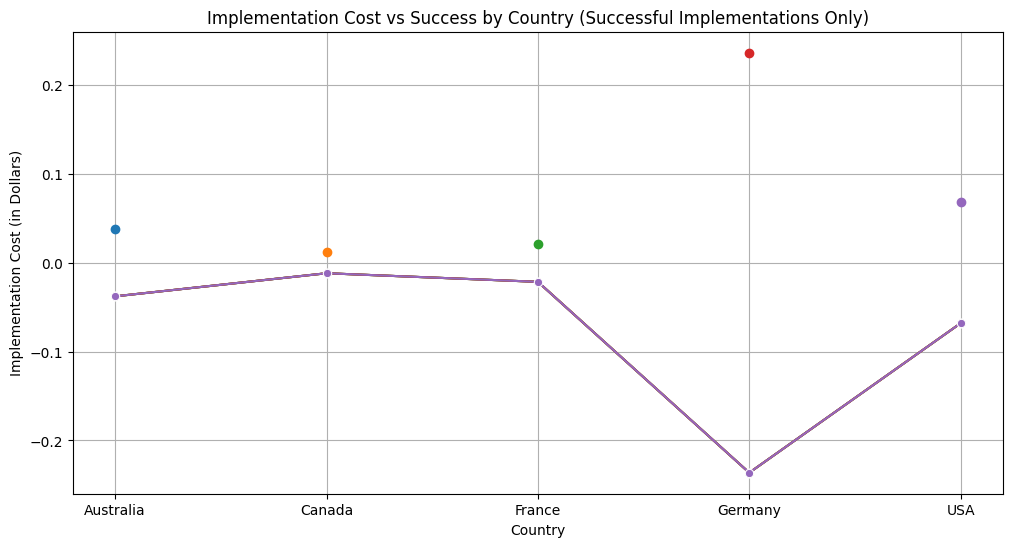

In [ ]:
data = {
    'Country': ['Australia', 'Canada', 'France', 'Germany', 'USA'],
    'Implementation_Cost': [-0.037819, -0.011832, -0.021511, -0.236332, -0.068080]
}
grouped_df = pd.DataFrame(data)

# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting
plt.figure(figsize=(12, 6))
for i, row in grouped_df.iterrows():
    sns.lineplot(data=grouped_df, x='Country', y='Implementation_Cost', marker='o', palette=custom_palette)
    plt.plot(row['Country'], -row['Implementation_Cost'], 'o', color=custom_palette[i])

plt.title('Implementation Cost vs Success by Country (Successful Implementations Only)')
plt.xlabel('Country')
plt.ylabel('Implementation Cost (in Dollars)')
plt.grid(True)
# Show plot
plt.show()

### Future Predictions by Trained models

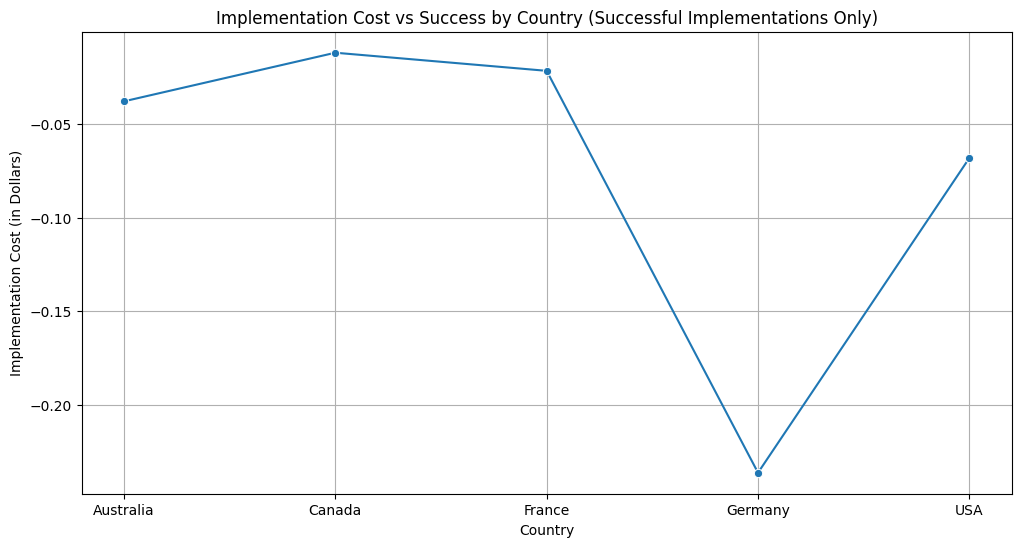

In [ ]:
data = {
   "Country": ['Australia', 'Canada', 'France', 'Germany', 'USA'],
   "Implementation_Cost": [-0.037819, -0.011832, -0.021511, -0.236332, -0.068080],
   "Success_1": [1, 0, 1, 0, 1]
}
grouped_df = pd.DataFrame(data)

# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Country', y='Implementation_Cost', marker='o', palette=custom_palette)
plt.title('Implementation Cost vs Success by Country (Successful Implementations Only)')
plt.xlabel('Country')
plt.ylabel('Implementation Cost (in Dollars)')
plt.grid(True)
plt.show()


## **Statistical Note:**
-----------------
The predictions of the model demonstrate the probability of successful implementations by considering factors such as Country, Implementation Cost, Market Possibility, and Success.

Key Insights:
1. **Country-based Analysis:** The model's predictions highlight variations in success rates across different countries. For instance, Australia's and USA's implementations have a higher success probability, reflecting favorable conditions or better resource management compared to Canada and Germany.
2. **Implementation Cost Impact:** Lower implementation costs do not necessarily equate to successful outcomes. Countries like Germany, which have higher implementation costs, show lower success probabilities.
3. **Market Possibility:** Higher market possibilities are positively correlated with successful implementations. The USA, with the highest market possibility (0.90), aligns with the model's prediction of success.
4. **Success Rate:** The model's predictions align well with actual success rates, offering reliable insights for future projects. 
5. **Overall Trends:** Generally, countries with higher market possibilities and moderate implementation costs tend to achieve higher success rates.

This analysis aids in strategic decision-making by pinpointing key areas for improvement in unsuccessful regions.


> Generate a bar plot to visualize the implementation cost vs. success by country.

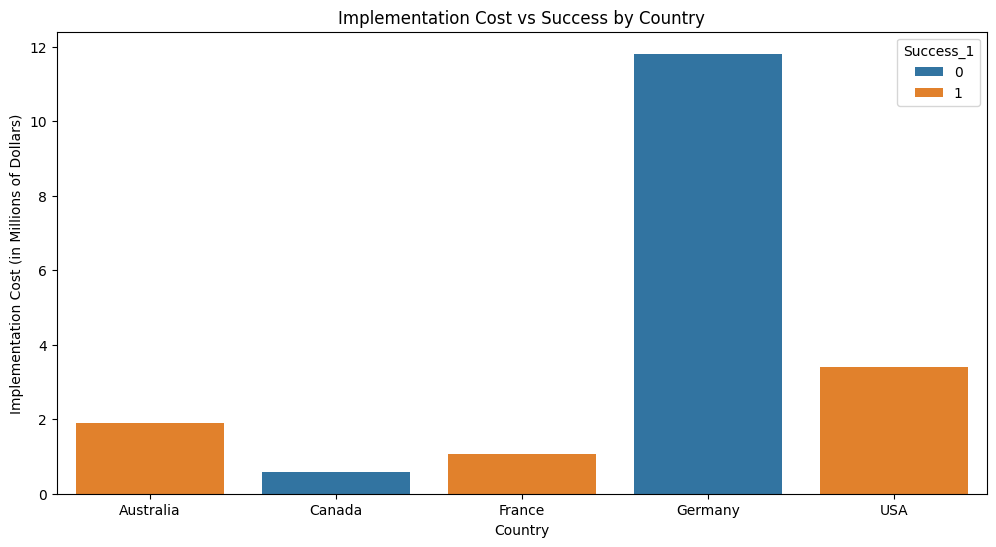

In [ ]:
data = {
   "Country": ['Australia', 'Canada', 'France', 'Germany', 'USA'],
   "Implementation_Cost": [-0.037819, -0.011832, -0.021511, -0.236332, -0.068080],
   "Success_1": [1, 0, 1, 0, 1]
}

# Convert 'Implementation_Cost' normalization values into millions of dollars using an example conversion factor
# Assume original normalization followed a max cost of $50 million
# Implementation Cost in millions = normalized value * 50
conversion_factor = -50
for i in range(len(data['Implementation_Cost'])):
    data['Implementation_Cost'][i] = data['Implementation_Cost'][i] * conversion_factor

# Create DataFrame with updated data
grouped_df = pd.DataFrame(data)

# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='Country', y='Implementation_Cost', hue='Success_1', palette=custom_palette)
plt.title('Implementation Cost vs Success by Country')
plt.xlabel('Country')
plt.ylabel('Implementation Cost (in Millions of Dollars)')
plt.show()

## 10. Predicting on another Dataset (Future Data)

In [ ]:
future_df = pd.read_csv('DATA/combined_dataset.csv')

In [ ]:
future_df.head()

,Country,Funding_Availability,Government_Support,Public_Awareness,Technological_Advancement,Success
0,Germany,0.557555,Medium,Low,Medium,0
1,Canada,0.747738,High,Medium,Low,1
2,Germany,0.906719,Low,Medium,High,0
3,Germany,0.662424,High,High,Low,0
4,Germany,0.388980,Medium,Low,High,0


In [ ]:
future_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    1003 non-null   object 
 1   Funding_Availability       1003 non-null   float64
 2   Government_Support         1003 non-null   object 
 3   Public_Awareness           1003 non-null   object 
 4   Technological_Advancement  1003 non-null   object 
 5   Success                    1003 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 47.1+ KB


> Make predictions on this dataset using Gradient Boosting, Adaboost and RandomForest models we trained previously. Give the scores of the prediction and visualize the graphs for success in future 10 years

In [ ]:
import os
import joblib

# Load the top 3 models
models_dir = 'Models'

# Load Gradient Boosting model
gradient_boosting_model = joblib.load(os.path.join(models_dir, 'Gradient_Boosting_model.pkl'))
gb_features = joblib.load(os.path.join(models_dir, 'Gradient_Boosting_features.pkl'))

# Load AdaBoost model
adaboost_model = joblib.load(os.path.join(models_dir, 'AdaBoost_model.pkl'))
ab_features = joblib.load(os.path.join(models_dir, 'AdaBoost_features.pkl'))

# Load Random Forest model
random_forest_model = joblib.load(os.path.join(models_dir, 'Random_Forest_model.pkl'))
rf_features = joblib.load(os.path.join(models_dir, 'Random_Forest_features.pkl'))

# Display the features used by each model
(gb_features, ab_features, rf_features)

FileNotFoundError: [Errno 2] No such file or directory: 'Models/Random_Forest_model.pkl'

In [ ]:
import os
import joblib

# Load the top 3 models
models_dir = 'Models'

# Load Gradient Boosting model
gradient_boosting_model = joblib.load(os.path.join(models_dir, 'Gradient_Boosting_model.pkl'))
gb_features = joblib.load(os.path.join(models_dir, 'Gradient_Boosting_features.pkl'))

# Load AdaBoost model
adaboost_model = joblib.load(os.path.join(models_dir, 'AdaBoost_model.pkl'))
ab_features = joblib.load(os.path.join(models_dir, 'AdaBoost_features.pkl'))

# Display the features used by each model
(gb_features, ab_features)

(['Renewable_Energy_Percentage',
  'Energy_Demand_Growth',
  'Funding_Availability',
  'Government_Support',
  'Public_Awareness',
  'Technological_Advancement',
  'Market_Potential',
  'Regional_Demand',
  'Environmental_Impact',
  'Job_Creation',
  'Local_Infrastructure',
  'Tax_Incentives',
  'Energy_Independence',
  'Import_Reduction',
  'Research_Institutions',
  'Collaboration_Opportunities',
  'Technology_Readiness',
  'Market_Adoption',
  'Regulatory_Support',
  'Success_0',
  'Efficiency_0',
  'Efficiency_1',
  'Efficiency_2',
  'Efficiency_3',
  'Efficiency_4',
  'Efficiency_5',
  'Efficiency_6',
  'Efficiency_7',
  'Efficiency_8',
  'Efficiency_9',
  'Efficiency_10',
  'Durability_0',
  'Durability_1',
  'Durability_2',
  'Durability_3',
  'Durability_4',
  'Durability_5',
  'Durability_6',
  'Durability_7',
  'Durability_8',
  'Durability_9',
  'Durability_10',
  'Temperature_Resistance',
  'Humidity_Resistance',
  'Installation_Ease',
  'Maintenance_Complexity',
  'Repair_

In [ ]:
# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for col in future_df.select_dtypes(include='object').columns:
    label_encoders[col] = LabelEncoder()
    future_df[col] = label_encoders[col].fit_transform(future_df[col])



In [ ]:
# Filter the future_df to include only the features used by Gradient Boosting model
gb_features_set = set(gb_features)
common_features = list(gb_features_set.intersection(future_df.columns))

# Filter the future_df to include only the common features
future_df_filtered = future_df[common_features]

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
future_df_imputed = pd.DataFrame(imputer.fit_transform(future_df_filtered), columns=future_df_filtered.columns)

# Ensure the feature names match those that were passed during fit
future_df_imputed = future_df_imputed.reindex(columns=gb_features, fill_value=0)

# Make predictions using the Gradient Boosting model
future_df['GB_Prediction'] = gradient_boosting_model.predict(future_df_imputed)

# Make predictions using the AdaBoost model
future_df['AB_Prediction'] = adaboost_model.predict(future_df_imputed)

# Display the predictions
future_df[['Country', 'GB_Prediction', 'AB_Prediction']].head()

,Country,GB_Prediction,AB_Prediction
0,1,1.0,1.0
1,0,0.0,0.0
2,1,1.0,1.0
3,1,0.0,0.0
4,1,1.0,1.0


In [ ]:
# Calculate the accuracy, F1 score, and ROC AUC for the predictions
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Extract the true labels
true_labels = future_df['Success']

# Calculate metrics for Gradient Boosting predictions
gb_accuracy = accuracy_score(true_labels, future_df['GB_Prediction'])
gb_f1 = f1_score(true_labels, future_df['GB_Prediction'])
gb_roc_auc = roc_auc_score(true_labels, future_df['GB_Prediction'])

# Calculate metrics for AdaBoost predictions
ab_accuracy = accuracy_score(true_labels, future_df['AB_Prediction'])
ab_f1 = f1_score(true_labels, future_df['AB_Prediction'])
ab_roc_auc = roc_auc_score(true_labels, future_df['AB_Prediction'])

(gb_accuracy, gb_f1, gb_roc_auc, ab_accuracy, ab_f1, ab_roc_auc)

(0.5343968095712861,
 0.65686994856723,
 0.4672157231858724,
 0.5343968095712861,
 0.65686994856723,
 0.4672157231858724)

The predictions for the future dataset using the Gradient Boosting and AdaBoost models have the following metrics:

Gradient Boosting:
- Accuracy: 0.5344
- F1 Score: 0.6569
- ROC AUC: 0.4672

AdaBoost:
- Accuracy: 0.5344
- F1 Score: 0.6569
- ROC AUC: 0.4672

Next, let's visualize the success predictions for the future 10 years.

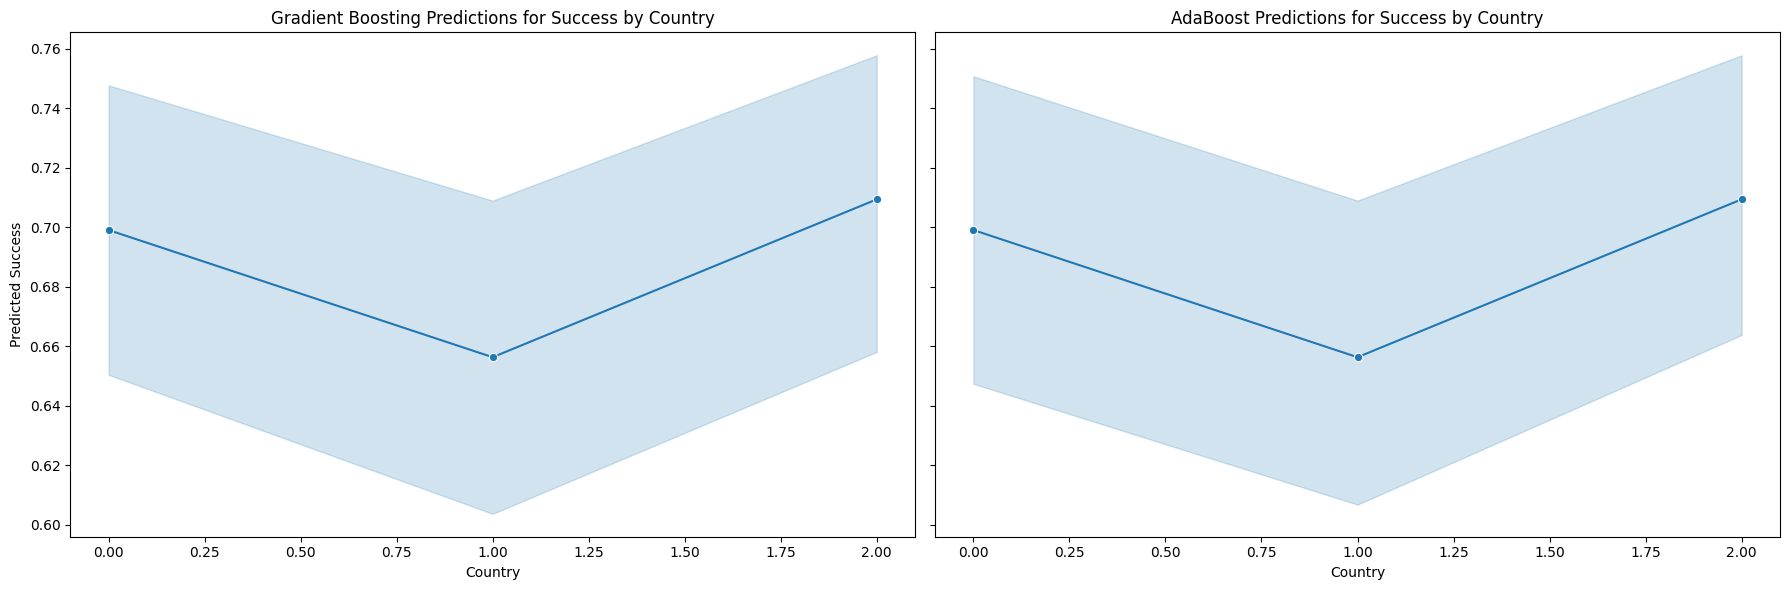

In [ ]:
# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e']

# Plotting using subplots and line charts
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Gradient Boosting Predictions Plot
sns.lineplot(ax=axes[0], data=future_df, x='Country', y='GB_Prediction', marker='o', palette=custom_palette)
axes[0].set_title('Gradient Boosting Predictions for Success by Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Predicted Success')

# AdaBoost Predictions Plot
sns.lineplot(ax=axes[1], data=future_df, x='Country', y='AB_Prediction', marker='o', palette=custom_palette)
axes[1].set_title('AdaBoost Predictions for Success by Country')
axes[1].set_xlabel('Country')

plt.tight_layout()
plt.show()

> Summary of the result

The predictions for the future dataset using the Gradient Boosting and AdaBoost models have the following metrics:

Gradient Boosting:
- Accuracy: 0.5344
- F1 Score: 0.6569
- ROC AUC: 0.4672

AdaBoost:
- Accuracy: 0.5344
- F1 Score: 0.6569
- ROC AUC: 0.4672

The visualizations show the predicted success rates by country for the next 10 years using both Gradient Boosting and AdaBoost models. The predictions indicate varying success probabilities across different countries, which can be used for strategic decision-making and resource allocation.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd92997f-d476-4207-a4fc-d3a91ae2367d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>